In [22]:
import numpy as np
import scipy
from tqdm import tqdm
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt


In [23]:
def func(x,y=2, N = 1000):
        b1 = y * N /2
        b0 = y * N /2
        k = 2/np.sqrt(x*N)*(1 - np.log(x)/np.log(N)) + b1/b0 * x * (1 + np.log(x)/np.log(N)) +1/(np.sqrt(x*N)) * (b0+1)/b0/np.log(N)
        return 1/k

In [23]:
N = np.linspace(1000,100000,100)
dens = np.linspace(1/1000,1,100)

x = N
y = dens
x,y = y,x
X1, Y1 = np.meshgrid(x, y)

Z1 = np.zeros((len(X1), len(Y1)))
for i,n in tqdm(enumerate(N), total=len(N)):
    for j,d in enumerate(dens):
        Z1[i,j] = scipy.optimize.fmin(lambda x: -func(x, d, n), 0.05, disp=False)
        

  0%|          | 0/100 [00:00<?, ?it/s]/tmp/ipykernel_5079/1695403784.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Z[i,j] = scipy.optimize.fmin(lambda x: -func(x,d,n), 0.05,disp=False)
100%|██████████| 100/100 [00:20<00:00,  4.81it/s]


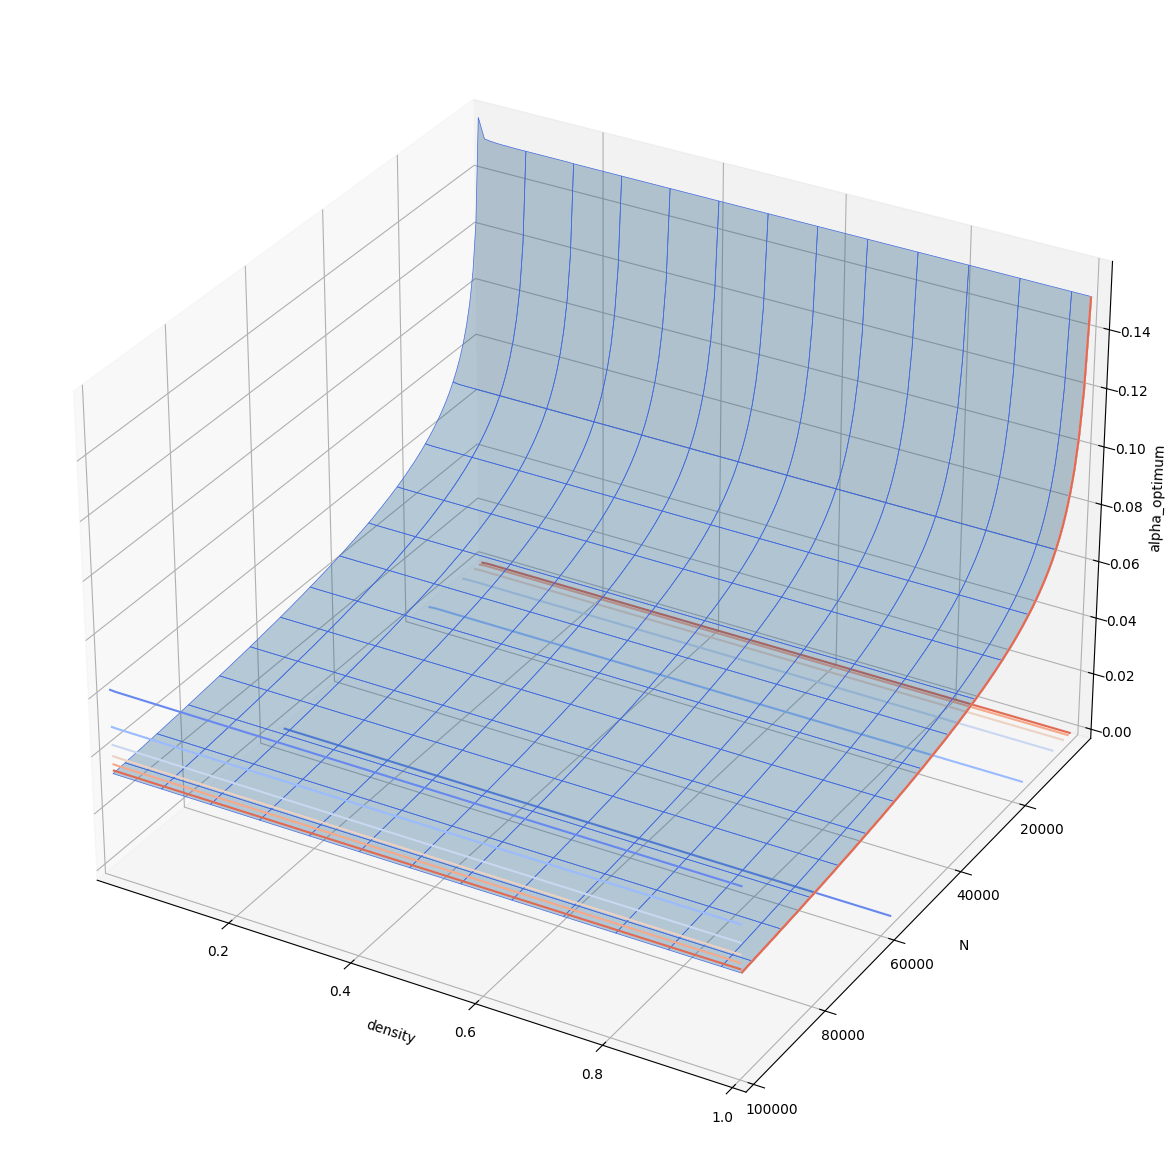

In [24]:

        
ax = plt.figure(figsize=(15,15)).add_subplot(projection='3d')
ax.plot_surface(X1, Y1, Z1, edgecolor='royalblue', lw=0.5, rstride=8, cstride=8,
                alpha=0.3)
ax.contour(X1, Y1, Z1, zdir='z', offset=0, cmap='coolwarm')
ax.contour(X1, Y1, Z1, zdir='x', offset=np.max(X1), cmap='coolwarm')
ax.contour(X1, Y1, Z1, zdir='y', offset=np.max(Y1), cmap='coolwarm')
# 
ax.set(xlim=(np.min(X1), np.max(X1)), ylim=(np.max(Y1), np.min(Y1)), zlim=(0, np.max(Z1)),
       xlabel='density', ylabel='N', zlabel='alpha_optimum')
plt.show()

In [24]:
N = np.linspace(1000,100000,100)
dens = np.linspace(1/1000,1,100)

x = N
y = dens
x,y = y,x
X2, Y2 = np.meshgrid(x, y)

Z2 = np.zeros((len(X1), len(Y1)))
for i,n in tqdm(enumerate(N), total=len(N)):
    for j,d in enumerate(dens):
        Z1[i,j] = func(scipy.optimize.fmin(lambda x: -func(x, d, n), 0.05, disp=False), d, n)

  0%|          | 0/100 [00:00<?, ?it/s]/tmp/ipykernel_5079/3642156838.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Z[i,j] = func(scipy.optimize.fmin(lambda x: -func(x,d,n), 0.05,disp=False), d,n)
100%|██████████| 100/100 [00:19<00:00,  5.01it/s]


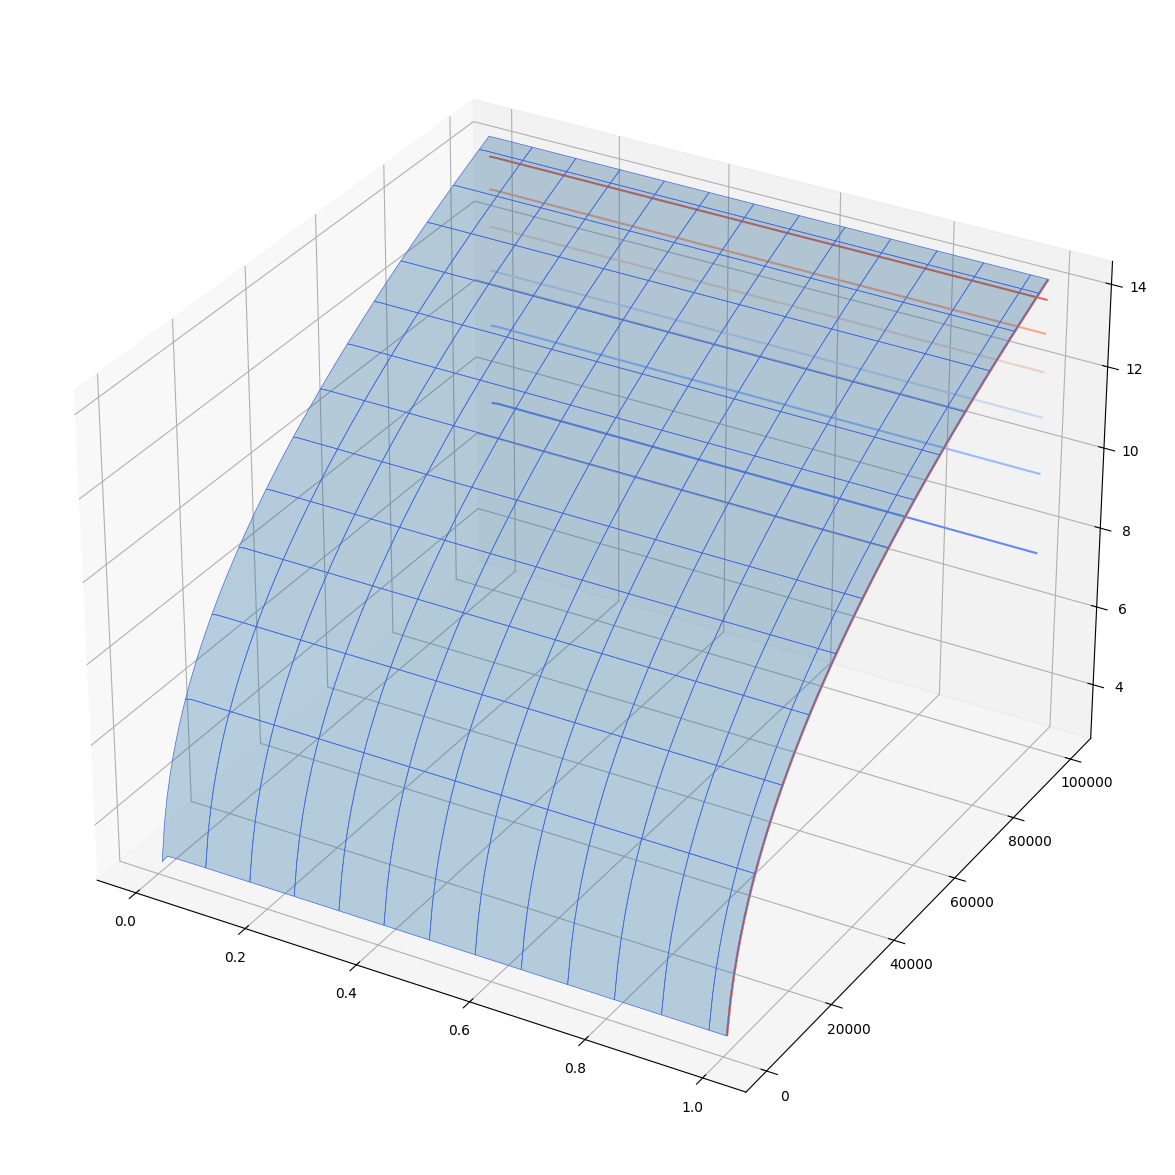

In [25]:

ax = plt.figure(figsize=(15,15)).add_subplot(projection='3d')
# X, Y, Z = axes3d.get_test_data(0.05)
# X = np.repeat(np.log(N), len(dens))
# Y = dens + 
# 0
# Z = np.zeros(len(X) * len(Y))

# Plot the 3D surface
ax.plot_surface(X2, Y2, Z2, edgecolor='royalblue', lw=0.5, rstride=8, cstride=8,
                alpha=0.3)
# ax.plot_surface(x, y, z,edgecolor='r', lw=0.5, rstride=8, cstride=8,
#                 alpha=0.3)
# x = N + 0
# y = x**(1/3) +1
# ax.plot(x,y, c = 'r')
# # Plot projections of the contours for each dimension.  By choosing offsets
# # that match the appropriate axes limits, the projected contours will sit on
# # the 'walls' of the graph.
ax.contour(X2, Y2, Z2, zdir='z', offset=0 cmap='coolwarm')
ax.contour(X2, Y2, Z2, zdir='x', offset=np.max(X1), cmap='coolwarm')
ax.contour(X2, Y2, Z2, zdir='y', offset=np.max(Y1), cmap='coolwarm')
# 
# ax.set(xlim=(np.min(X),np.max(X)), ylim=(np.max(Y),np.min(Y)), zlim=(0, np.max(Z)),
#        xlabel='density', ylabel='N', zlabel='alpha_optimum')
plt.show()